In [111]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [162]:
synop = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx')
synop = synop.rename(columns = {'idő (CET)':'Time (CET)'})
synop = synop[(synop['Time (CET)'] >= '2021-01-28 00:30:00') & (synop['Time (CET)'] <= '2021-02-07 00:00:00')]
synop = synop.reset_index()
synop['Time (CET)'] = pd.to_datetime(synop['Time (CET)'])
synop = synop.resample('30min', on = 'Time (CET)', closed = 'left').mean()


synop = synop.reset_index()
synop = synop.iloc[6:, :]
synop = synop.reset_index()

In [113]:
soil_flux = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/soil_heat.xlsx', header= 1)


In [114]:
soil_flux = soil_flux.iloc[24:, :]

In [115]:
soil_flux.reset_index(inplace= True)

In [116]:
soil_flux

,index,TIMESTAMP,RECORD,Shf_1_Avg,Shf_2_Avg,batt_volt_Avg,Unnamed: 5
0,24,2020-12-29 15:40:00,55987,9.84,11.46,12.73,10.65
1,25,2020-12-29 15:41:00,55988,9.84,11.42,12.72,10.63
2,26,2020-12-29 15:42:00,55989,9.95,11.38,12.73,10.665
3,27,2020-12-29 15:43:00,55990,9.92,11.34,12.73,10.63
4,28,2020-12-29 15:44:00,55991,9.92,11.29,12.74,10.605
...,...,...,...,...,...,...,...
181260,181284,2021-05-04 12:46:00,237247,30.65,39.67,12.58,35.16
181261,181285,2021-05-04 12:47:00,237248,30.77,39.81,12.36,35.29
181262,181286,2021-05-04 12:48:00,237249,30.89,39.96,12.25,35.425
181263,181287,2021-05-04 12:49:00,237250,31.01,40.1,12.23,35.555


In [117]:
soil_flux = soil_flux[(soil_flux['TIMESTAMP'] >= datetime.strptime('2020-12-29 15:40:00', '%Y-%m-%d %H:%M:%S')) &
                     (soil_flux['TIMESTAMP'] <= datetime.strptime('2021-03-31 23:50:00', '%Y-%m-%d %H:%M:%S'))]


In [118]:


storage_flux = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/g_stor.xlsm', 
                             sheet_name= 'gstor', header=1)

In [119]:
storage_flux = storage_flux[(storage_flux['timestamp'] >= '2020-12-29 15:40:00') & 
                            (storage_flux['timestamp'] <= '2021-03-31 23:50:00')]


In [120]:
storage_flux.columns

Index(['DTS', 'SW_5', 'DT10', 'DT5', 'DT2', 'Gstor', 'timestamp'], dtype='object')

In [121]:
storage_flux['time'] = pd.date_range("2020-12-29 13:40:00","2021-03-31 21:50:00", freq= '10T')

In [122]:
storage_flux

,DTS,SW_5,DT10,DT5,DT2,Gstor,timestamp,time
0,0.009063,0.15085,0.0480,0.0130,-0.0050,1.986845,2020-12-29 15:40:00.000,2020-12-29 13:40:00
1,0.007162,0.15050,0.0420,0.0200,-0.0150,1.568883,2020-12-29 15:50:00.000,2020-12-29 13:50:00
2,-0.030094,0.15050,0.0385,0.0110,-0.0900,-6.591771,2020-12-29 15:59:59.990,2020-12-29 14:00:00
3,-0.049369,0.15050,0.0325,-0.0070,-0.1140,-10.813790,2020-12-29 16:09:59.985,2020-12-29 14:10:00
4,-0.056900,0.15050,0.0255,-0.0215,-0.1145,-12.463444,2020-12-29 16:19:59.980,2020-12-29 14:20:00
...,...,...,...,...,...,...,...,...
13293,-0.123188,0.06500,-0.0900,-0.1200,-0.1350,-21.059642,2021-03-31 23:09:59.995,2021-03-31 21:10:00
13294,-0.125375,0.06475,-0.0900,-0.1200,-0.1400,-21.415981,2021-03-31 23:19:59.995,2021-03-31 21:20:00
13295,-0.116500,0.06415,-0.0900,-0.1100,-0.1300,-19.860682,2021-03-31 23:29:59.995,2021-03-31 21:30:00
13296,-0.120438,0.06400,-0.0850,-0.1200,-0.1300,-20.521779,2021-03-31 23:39:59.995,2021-03-31 21:40:00


In [123]:
soil_flux.columns

Index(['index', 'TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg',
       'batt_volt_Avg', 'Unnamed: 5'],
      dtype='object')

In [124]:
soil_flux = soil_flux.rename({'Unnamed: 5': 'soil_flux'}, axis=1)  # new method

In [125]:
soil_flux['TIMESTAMP'] = pd.to_datetime(soil_flux['TIMESTAMP'])


In [126]:
soil_flux= soil_flux.iloc[:, 1:].resample('10min', closed= 'left', on = 'TIMESTAMP').mean()

In [127]:
soil_flux

,TIMESTAMP,RECORD,Shf_1_Avg,Shf_2_Avg,batt_volt_Avg,soil_flux
TIMESTAMP,,,,,,
2020-12-29 15:40:00,2020-12-29 15:44:30,55991.5,9.8500,11.2750,12.732,10.5625
2020-12-29 15:50:00,2020-12-29 15:54:30,56001.5,9.5740,10.9110,12.735,10.2425
2020-12-29 16:00:00,2020-12-29 16:04:30,56011.5,9.1100,10.5480,12.725,9.8290
2020-12-29 16:10:00,2020-12-29 16:14:30,56021.5,8.5300,10.0520,12.739,9.2910
2020-12-29 16:20:00,2020-12-29 16:24:30,56031.5,7.8738,9.4490,12.731,8.6614
...,...,...,...,...,...,...
2021-03-31 23:10:00,2021-03-31 23:14:30,188915.5,-1.8328,-1.1438,13.033,-1.4883
2021-03-31 23:20:00,2021-03-31 23:24:30,188925.5,-2.2371,-1.5961,13.036,-1.9166
2021-03-31 23:30:00,2021-03-31 23:34:30,188935.5,-2.6296,-2.0270,13.038,-2.3283


In [128]:
soil_flux.columns

Index(['TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg', 'batt_volt_Avg',
       'soil_flux'],
      dtype='object')

In [129]:
storage_flux.columns

Index(['DTS', 'SW_5', 'DT10', 'DT5', 'DT2', 'Gstor', 'timestamp', 'time'], dtype='object')

In [130]:
print(storage_flux.shape, soil_flux.shape)

(13298, 8) (13298, 6)


In [131]:
soil_flux['timee'] = soil_flux.index
soil_flux = soil_flux.drop('TIMESTAMP', axis = 1)
soil_flux.reset_index(inplace = True)

In [132]:
storage_flux

,DTS,SW_5,DT10,DT5,DT2,Gstor,timestamp,time
0,0.009063,0.15085,0.0480,0.0130,-0.0050,1.986845,2020-12-29 15:40:00.000,2020-12-29 13:40:00
1,0.007162,0.15050,0.0420,0.0200,-0.0150,1.568883,2020-12-29 15:50:00.000,2020-12-29 13:50:00
2,-0.030094,0.15050,0.0385,0.0110,-0.0900,-6.591771,2020-12-29 15:59:59.990,2020-12-29 14:00:00
3,-0.049369,0.15050,0.0325,-0.0070,-0.1140,-10.813790,2020-12-29 16:09:59.985,2020-12-29 14:10:00
4,-0.056900,0.15050,0.0255,-0.0215,-0.1145,-12.463444,2020-12-29 16:19:59.980,2020-12-29 14:20:00
...,...,...,...,...,...,...,...,...
13293,-0.123188,0.06500,-0.0900,-0.1200,-0.1350,-21.059642,2021-03-31 23:09:59.995,2021-03-31 21:10:00
13294,-0.125375,0.06475,-0.0900,-0.1200,-0.1400,-21.415981,2021-03-31 23:19:59.995,2021-03-31 21:20:00
13295,-0.116500,0.06415,-0.0900,-0.1100,-0.1300,-19.860682,2021-03-31 23:29:59.995,2021-03-31 21:30:00
13296,-0.120438,0.06400,-0.0850,-0.1200,-0.1300,-20.521779,2021-03-31 23:39:59.995,2021-03-31 21:40:00


In [148]:
soil_flux_t = pd.concat([soil_flux, storage_flux],axis=1 )

In [149]:
soil_flux_t.columns

Index(['TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg', 'batt_volt_Avg',
       'soil_flux', 'timee', 'DTS', 'SW_5', 'DT10', 'DT5', 'DT2', 'Gstor',
       'timestamp', 'time'],
      dtype='object')

In [150]:
soil_flux_t['soil_flux_t'] = soil_flux_t['soil_flux'] + soil_flux_t['Gstor']

In [151]:
soil_flux_t.columns

Index(['TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg', 'batt_volt_Avg',
       'soil_flux', 'timee', 'DTS', 'SW_5', 'DT10', 'DT5', 'DT2', 'Gstor',
       'timestamp', 'time', 'soil_flux_t'],
      dtype='object')

In [85]:
f1 = pd.read_csv('/Volumes/Seagate Backup Plus Drive/eddypro_data/jan/28_01_01_02/eddypro_csat_full_output_2021-10-25T215503_exp.csv',
                skiprows=1, usecols= np.r_[0:17])

In [86]:
f1 = f1.iloc[1:, :]

In [87]:
f2 = pd.read_csv('/Volumes/Seagate Backup Plus Drive/eddypro_data/feb/02_02_06_02/eddypro_csat_full_output_2021-10-25T195053_exp.csv',
                skiprows=1, usecols= np.r_[0:17])

In [88]:
f2 = f2.iloc[1:, :]

In [89]:
fluxes = pd.concat([f1, f2], axis = 0)

In [171]:
fluxes.reset_index(inplace= True)

In [152]:
soil_flux_t = soil_flux_t.resample('30min',on = 'TIMESTAMP', closed = 'left').mean()

In [153]:
soil_flux_t

,RECORD,Shf_1_Avg,Shf_2_Avg,batt_volt_Avg,soil_flux,DTS,SW_5,DT10,DT5,DT2,Gstor,soil_flux_t
TIMESTAMP,,,,,,,,,,,,
2020-12-29 15:30:00,55996.5,9.712000,11.093000,12.733500,10.402500,0.008113,0.150675,0.045000,0.016500,-0.010000,1.777864,12.180364
2020-12-29 16:00:00,56021.5,8.504600,10.016333,12.731667,9.260467,-0.045454,0.150500,0.032167,-0.005833,-0.106167,-9.956335,-0.695869
2020-12-29 16:30:00,56051.5,6.357000,7.908133,12.722000,7.132567,-0.086694,0.150500,0.008667,-0.048500,-0.150500,-18.989503,-11.856936
2020-12-29 17:00:00,56081.5,4.156900,5.398200,12.724667,4.777550,-0.063033,0.150133,-0.012333,-0.055000,-0.084333,-13.794847,-9.017297
2020-12-29 17:30:00,56111.5,2.666967,3.595867,12.729333,3.131417,-0.045410,0.149500,-0.017333,-0.041000,-0.057167,-9.921213,-6.789797
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 21:30:00,188825.5,3.118500,4.302267,12.990000,3.710383,-0.158917,0.065000,-0.100000,-0.146667,-0.186667,-27.167758,-23.457374
2021-03-31 22:00:00,188855.5,1.254300,2.252567,13.004333,1.753433,-0.148958,0.065000,-0.096667,-0.138333,-0.173333,-25.465321,-23.711887
2021-03-31 22:30:00,188885.5,-0.430467,0.421833,13.019333,-0.004317,-0.138667,0.065000,-0.096667,-0.131667,-0.156667,-23.705899,-23.710215


In [154]:
soil_flux_t['TIMEutc+2'] = soil_flux_t.index
soil_flux_t.reset_index(inplace= True)

In [158]:
soil_flux_t_f = soil_flux_t[(soil_flux_t['TIMEutc+2']>= '2021-01-28 00:30:00')&
                           (soil_flux_t['TIMEutc+2'] <= '2021-02-07 00:00:00')]

In [161]:
soil_flux_t_f.reset_index(inplace=True)

In [234]:
fluxes_t = pd.concat([soil_flux_t_f, fluxes[['Tau', 'qc_Tau', 'H', 
                                             'qc_H', 'LE', 'qc_LE', 
                                             'co2_flux', 'qc_co2_flux', 
                                             'h2o_flux', 'qc_h2o_flux']], synop], axis = 1)

In [235]:
fluxes_t.columns

Index(['index', 'TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg',
       'batt_volt_Avg', 'soil_flux', 'DTS', 'SW_5', 'DT10', 'DT5', 'DT2',
       'Gstor', 'soil_flux_t', 'TIMEutc+2', 'Tau', 'qc_Tau', 'H', 'qc_H', 'LE',
       'qc_LE', 'co2_flux', 'qc_co2_flux', 'h2o_flux', 'qc_h2o_flux',
       'level_0', 'Time (CET)', 'index', 'T', 'U', 'P', 'FS', 'FSD', 'R', 'V',
       'SR', 'SREF', 'SAL', 'SSUL', 'ET10', 'ET20', 'ET50', 'ET100', 'EU10',
       'EU20', 'EU50'],
      dtype='object')

In [236]:
fluxes_t['utctime'] = pd.date_range("2021-01-27 23:30:00","2021-02-06 23:00:00", freq= '30T')


In [322]:
x = pd.to_numeric(fluxes_t['LE'])
fluxes_t['H'] = pd.to_numeric(fluxes_t['H'])

In [323]:
a = np.array(x.values.tolist())
b = np.where((a <= -60.0), np.nan, a)
c = np.where(b >= 100.0, np.nan, b)
fluxes_t['LE_c'] = c

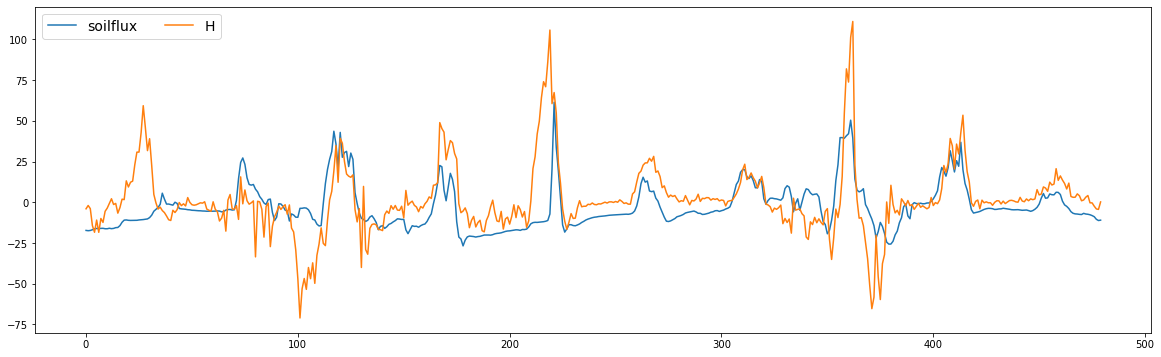

In [328]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }       


ax.plot(fluxes_t['soil_flux_t'], label = 'soilflux')
#ax.plot(fluxes_t['LE_c'], label= 'LE')
ax.plot(fluxes_t['H'], label= 'H')




ax.legend(loc= 'upper left', prop={'size': 14}, ncol = 5)


In [220]:
fluxes_t.columns

Index(['index', 'TIMESTAMP', 'RECORD', 'Shf_1_Avg', 'Shf_2_Avg',
       'batt_volt_Avg', 'soil_flux', 'DTS', 'SW_5', 'DT10', 'DT5', 'DT2',
       'Gstor', 'soil_flux_t', 'TIMEutc+2', 'Tau', 'qc_Tau', 'H', 'qc_H', 'LE',
       'qc_LE', 'co2_flux', 'qc_co2_flux', 'h2o_flux', 'qc_h2o_flux',
       'level_0', 'Time (CET)', 'index', 'T', 'U', 'P', 'FS', 'FSD', 'R', 'V',
       'SR', 'SREF', 'SAL', 'SSUL', 'ET10', 'ET20', 'ET50', 'ET100', 'EU10',
       'EU20', 'EU50', 'utctime'],
      dtype='object')

In [303]:
x = pd.to_numeric(fluxes_t['LE'])


In [304]:
min(x)

-9999.0

In [305]:
a = np.array(x.values.tolist())

In [320]:
b = np.where((a <= -60.0), np.nan, a)
c = np.where(b >= 100.0, np.nan, b)


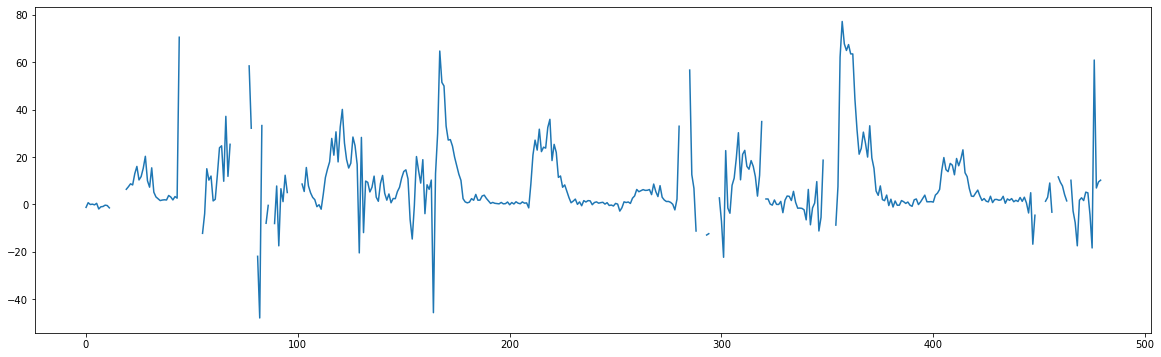

In [321]:
plt.plot(c)

In [297]:
type(b)

numpy.ndarray